In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def convert_to_float(value):
    """
    Transforms argument value to float;
    Replaces the comma in a string variable with a dot and rounds the value to two decimal places;
    
    Parameters
    --------
    value: float
    
    Returns
    --------
    float
    
    """
    value = float(str(value).replace(",", "."))
    value = round(value, 2)
    return value

#######################################################################################################################

In [4]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../data/textiles.csv', sep=';')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)
textiles['warp_mean'] = textiles.warp_mean.apply(convert_to_float)
textiles['weft_mean'] = textiles.weft_mean.apply(convert_to_float)
textiles['warp_dens'] = textiles.warp_dens.apply(convert_to_float)
textiles['weft_dens'] = textiles.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

In [5]:

# датафрейм - только узкие бинты;
n_bands = textiles[textiles['type'] == 'n_band']

########################################################################################################################

# датафрейм - только средние бинты;
m_bands = textiles[textiles['type'] == 'm_band']

########################################################################################################################

# датафрейм - только широкие бинты;
w_bands = textiles[textiles['type'] == 'w_band']

########################################################################################################################

# датафрейм - бинты всех типов;
bands = pd.concat([n_bands, m_bands, w_bands])

########################################################################################################################

shrouds = textiles[textiles['type'] == 'funeral_shroud']

########################################################################################################################

In [6]:
# Проценты типов бинтов от общего количества тканей

########################################################################################################################

# процент узких бинтов - от общего количества тканей;
nbands_percent = round((len(n_bands) / len(textiles)) * 100, 2)
# процент средних ьинтов - от общего количества тканей;
mbands_percent = round((len(m_bands) / len(textiles)) * 100, 2)
# процент широких бинтов - от общего количества тканей;
wbands_percent = round((len(w_bands) / len(textiles)) * 100, 2)
# процент всех бинтов - от общего количества тканей;
bands_percent = round((len(bands) / len(textiles)) * 100, 2)
# Процент погребальных пелен - от общего количества тканей
shrouds_percent = round((len(shrouds) / len(textiles)) * 100, 2)

########################################################################################################################

In [8]:
print("Процент узких бинтов - " + str(nbands_percent))
print("Процент средних бинтов - " + str(mbands_percent))
print("Процент широких бинтов - " + str(wbands_percent))
print("Процент бинтов (от общего количества тканей) - " + str(bands_percent))
print("Процент погребальных пелен (от общего количества тканей) - " + str(shrouds_percent))

Процент узких бинтов - 31.02
Процент средних бинтов - 26.73
Процент широких бинтов - 6.27
Процент бинтов (от общего количества тканей) - 64.03
Процент погребальных пелен (от общего количества тканей) - 8.91


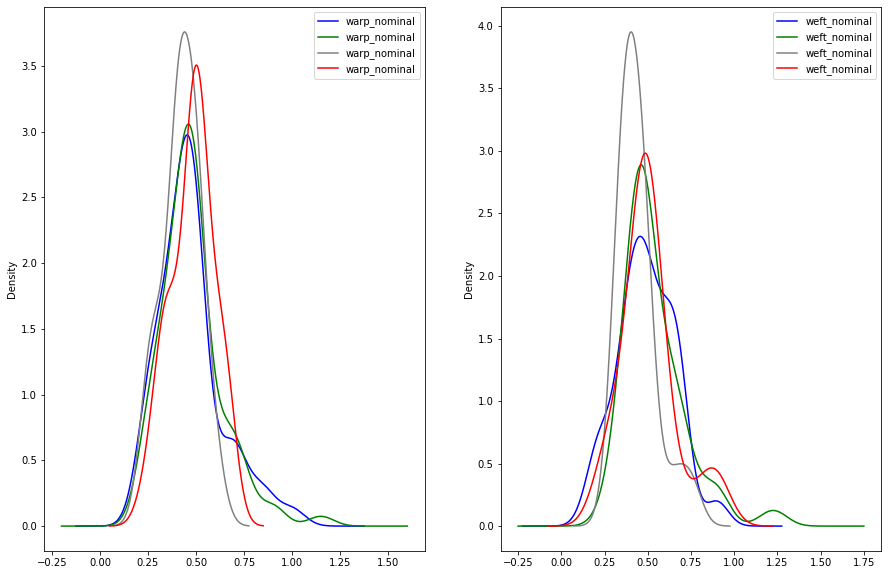

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

n_bands.warp_nominal.plot.kde(ax=ax[0], color='blue')
m_bands.warp_nominal.plot.kde(ax=ax[0], color='green')
w_bands.warp_nominal.plot.kde(ax=ax[0], color='gray')

shrouds.warp_nominal.plot.kde(ax=ax[0], color='red')

n_bands.weft_nominal.plot.kde(ax=ax[1], color='blue')
m_bands.weft_nominal.plot.kde(ax=ax[1], color='green')
w_bands.weft_nominal.plot.kde(ax=ax[1], color='gray')

shrouds.weft_nominal.plot.kde(ax=ax[1], color='red')

ax[0].legend()
ax[1].legend()

plt.show()

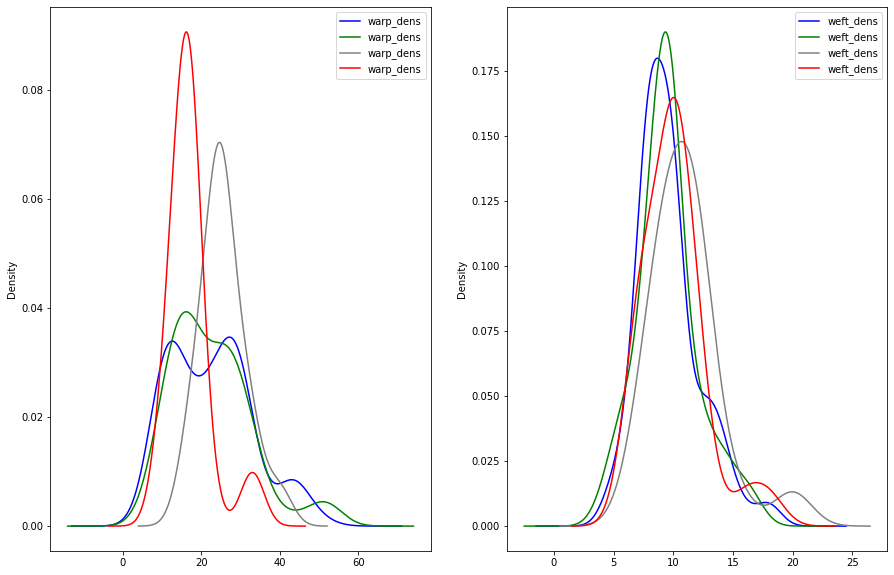

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

n_bands.warp_dens.plot.kde(ax=ax[0], color='blue')
m_bands.warp_dens.plot.kde(ax=ax[0], color='green')
w_bands.warp_dens.plot.kde(ax=ax[0], color='gray')

shrouds.warp_dens.plot.kde(ax=ax[0], color='red')

n_bands.weft_dens.plot.kde(ax=ax[1], color='blue')
m_bands.weft_dens.plot.kde(ax=ax[1], color='green')
w_bands.weft_dens.plot.kde(ax=ax[1], color='gray')

shrouds.weft_dens.plot.kde(ax=ax[1], color='red')

ax[0].legend()
ax[1].legend()

plt.show()

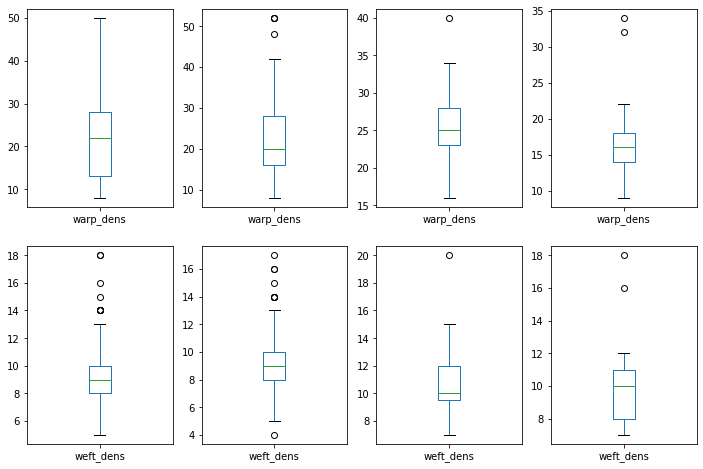

In [39]:
fig, ax = plt.subplots(2, 4, figsize=(12, 8))

n_bands.warp_dens.plot.box(ax=ax[0][0])
m_bands.warp_dens.plot.box(ax=ax[0][1])
w_bands.warp_dens.plot.box(ax=ax[0][2])
shrouds.warp_dens.plot.box(ax=ax[0][3])

n_bands.weft_dens.plot.box(ax=ax[1][0])
m_bands.weft_dens.plot.box(ax=ax[1][1])
w_bands.weft_dens.plot.box(ax=ax[1][2])
shrouds.weft_dens.plot.box(ax=ax[1][3])

plt.show()